In [1]:
import csv
import numpy as np
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate 
from astropy.cosmology import WMAP9 #import relevant cosmology (find way to automate this for each dataset)

In [2]:
#Define useful parameters

no_of_bins = 100
survey_area = 4

In [3]:
#Read in dataset

data_0 = pd.read_csv("tao_aponte_01_catalogue_3963.csv")
data_0
data_0[('Redshift_Observed')]

0         1.179420
1         1.173460
2         1.182460
3         1.172880
4         1.173380
            ...   
827971    0.167463
827972    0.168558
827973    0.167888
827974    0.165895
827975    0.167698
Name: Redshift_Observed, Length: 827976, dtype: float64

In [4]:
#Sort dataset by redshift by low to high

data = data_0.sort_values('Redshift_Observed')
data[('Redshift_Observed')]

160095    0.014090
217670    0.014421
217671    0.014884
217668    0.014949
217674    0.015225
            ...   
482401    1.205740
382182    1.206080
577975    1.206100
578036    1.206300
578008    1.206380
Name: Redshift_Observed, Length: 827976, dtype: float64

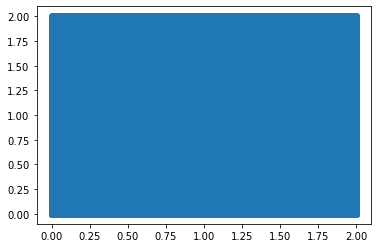

In [5]:
#Check that surveyed area is square

RA = data['Right_Ascension']
DEC = data['Declination']
plt.scatter(RA, DEC)

In [6]:
#Estimate supernova rate per stellar mass using arbitrary parameters for now (added the multiplcation for the units - 10^10  solar mass)

try:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['Total_Stellar_Mass'])))*(10**10)/(10**10.5)
except:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['total_stellar_mass'])))*(10**10)/(10**10.5)
    
#supernovae_rate_per_stellar_mass

In [7]:
#Estimate supernova rate per star formation rate using arbitrary parameters for now

try:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['Total_Star_Formation_Rate'])
except:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['total_star_formation_rate'])
    
#supernovae_rate_per_star_formation_rate

In [8]:
#Estimate TDE rate using arbitrary parameters for now

blackholemass = np.array(data['Black_Hole_Mass'])*10**10
bh = np.zeros_like(blackholemass)

bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))] = 1  
        
try:
    blackhole_rate_per_TDE_rate = ((1/10000))*(bh)
except:
    blackhole_rate_per_TDE_rate = ((1/10000))*(bh)
    
number_of_bh = len(bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))])

[0. 0. 0. ... 0. 0. 0.]


In [9]:
#Insert rates into tables

data.insert(loc=8,
          column='supernovae_rate_per_stellar_mass',
          value=supernovae_rate_per_stellar_mass)        

data.insert(loc=9,
          column='supernovae_rate_per_star_formation_rate',
          value=supernovae_rate_per_star_formation_rate)   

data.insert(loc=10,
          column='blackhole_rate_per_TDE_rate',
          value=blackhole_rate_per_TDE_rate)   

#data

In [10]:
#Some useful parameters regarding redshift

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
bins_z = np.linspace(np.min(z), np.max(z), no_of_bins)
binsize = (np.max(z) - np.min(z))/no_of_bins
digitized_z = np.digitize(z, bins_z) #creates mask for each bin
bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
#print(bins_z)
#print(np.shape(bins_z))

Text(0, 0.5, 'Comoving volume [Mpc^3]')

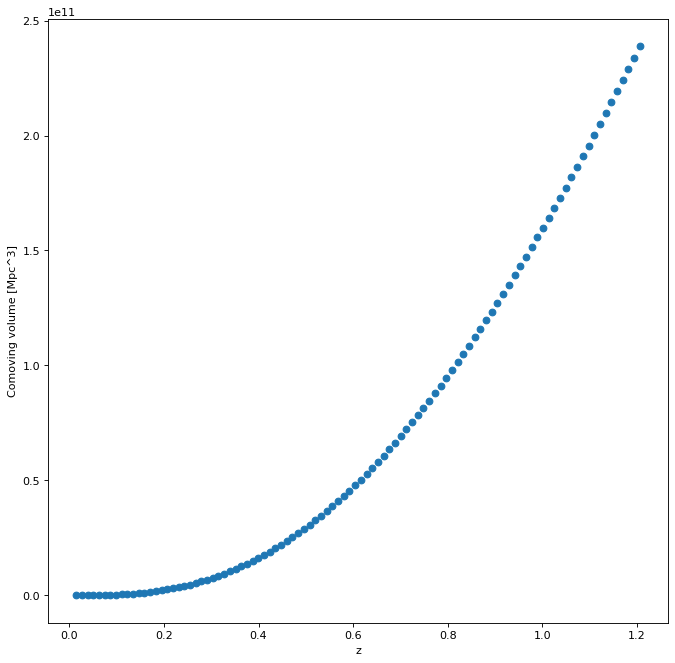

In [11]:
#Calculate Comoving Volume

comoving_volume = WMAP9.comoving_volume(bins_z)  #Give Volume in Mpc^3
comoving_volume_unbinned = WMAP9.comoving_volume(z)
#print(comoving_volume)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bins_z, comoving_volume)
plt.xlabel('z')
plt.ylabel('Comoving volume [Mpc^3]')

In [12]:
#TDE rates

tde = data['blackhole_rate_per_TDE_rate']
bin_sum_tde = [tde[digitized_z == i].sum() for i in range(0, len(bins_z))]
bin_sum_tde_per_square_degree = np.array(bin_sum_tde)/survey_area
bin_sum_tde_all_sky = bin_sum_tde_per_square_degree*41253
bin_sum_tde_all_sky_cum = np.cumsum(bin_sum_tde_all_sky)
bin_sum_tde_per_vol = bin_sum_tde_all_sky/comoving_volume
bin_sum_tde_per_vol_cum = np.cumsum(bin_sum_tde_per_vol)

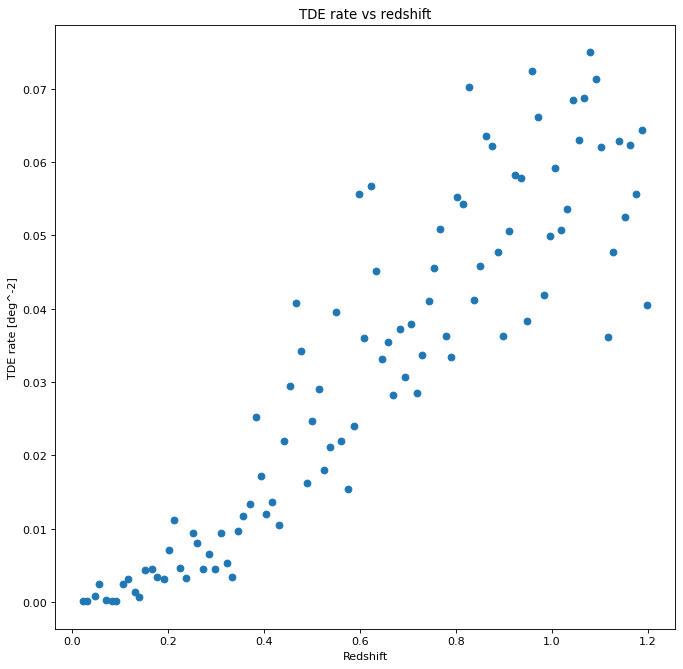

In [13]:
#TDE rate per square degree

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_tde_per_square_degree))
plt.xlabel('Redshift')
plt.ylabel('TDE rate [deg^-2]')
plt.title('TDE rate vs redshift')

plt.show()

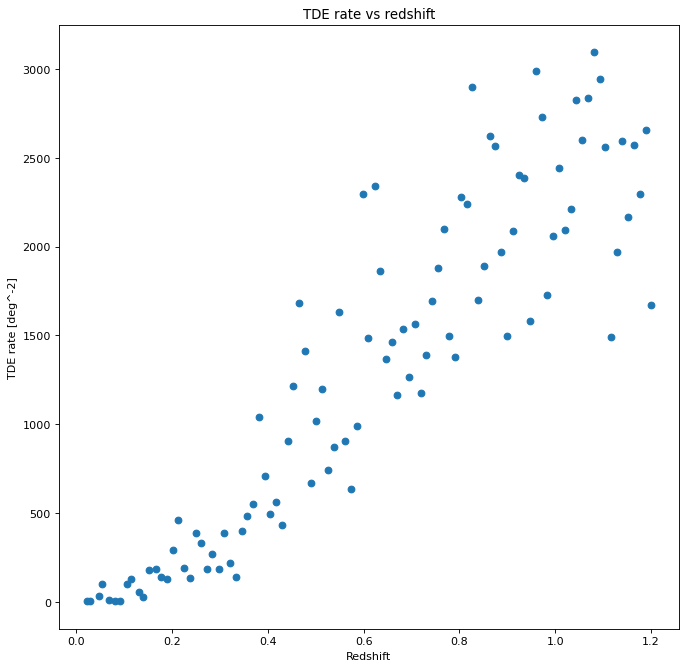

In [14]:
#TDE rate all sky

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_tde_all_sky))
plt.xlabel('Redshift')
plt.ylabel('TDE rate')
plt.title('TDE rate vs redshift')

plt.show()

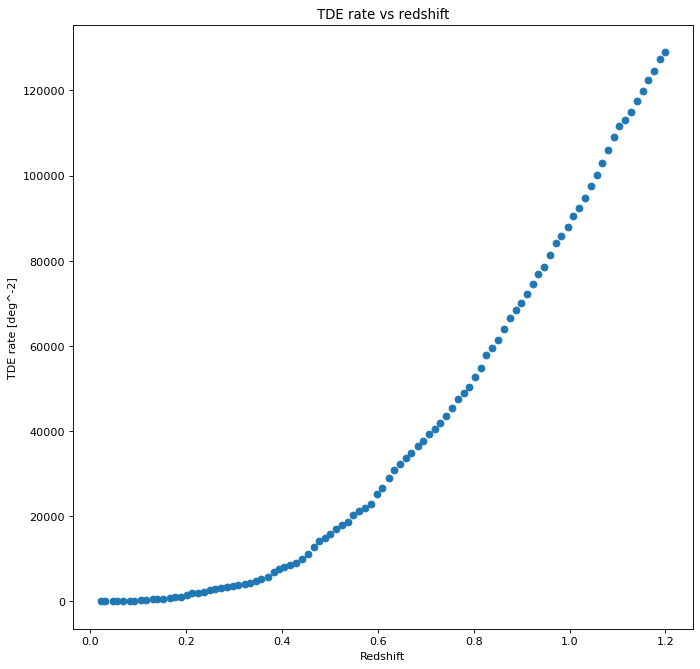

In [15]:
#TDE rate all sky cumulatove

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_tde_all_sky_cum))
plt.xlabel('Redshift')
plt.ylabel('Cumulative TDE rate')
plt.title('Cumulative TDE rate vs redshift')

plt.show()

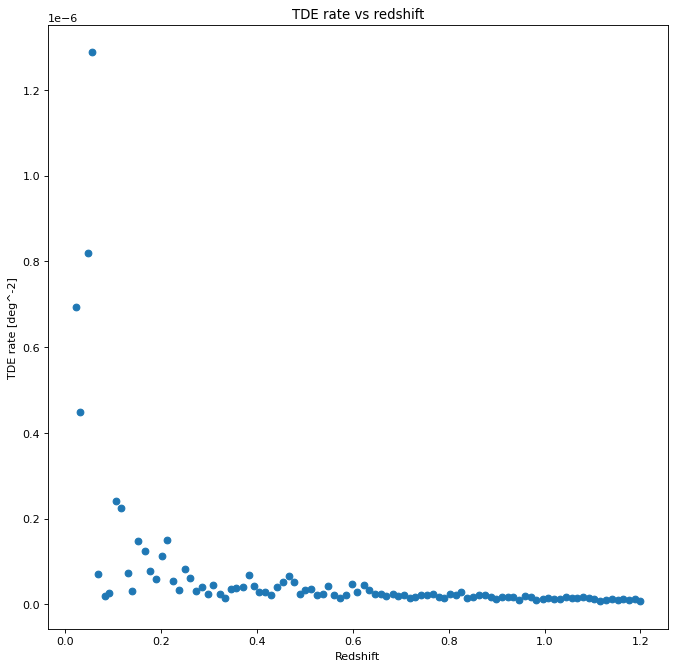

In [16]:
#TDE rate per Mpc^3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_tde_per_vol))
plt.xlabel('Redshift')
plt.ylabel('TDE rate [deg^-2]')
plt.title('TDE rate vs redshift')

plt.show()

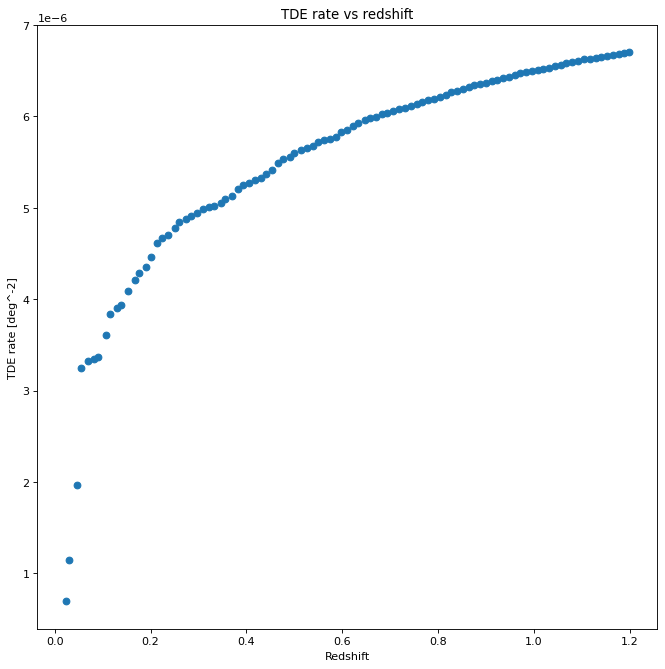

In [17]:
#TDE rate per Mpc^3 cumulative

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_tde_per_vol_cum))
plt.xlabel('Redshift')
plt.ylabel('Cumulative TDE rate [deg^-2]')
plt.title('Cumulative TDE rate vs redshift')

plt.show()

In [18]:
#Supernova rates per stellar mass

sm = data['supernovae_rate_per_stellar_mass']
bin_sum_sm = [sm[digitized_z == i].sum() for i in range(0, len(bins_z))]
bin_sum_sm_per_square_degree = np.array(bin_sum_sm)/survey_area
bin_sum_sm_all_sky = bin_sum_sm_per_square_degree*41253
bin_sum_sm_all_sky_cum = np.cumsum(bin_sum_sm_all_sky)
bin_sum_sm_per_vol = bin_sum_sm_all_sky/comoving_volume
bin_sum_sm_per_vol_cum = np.cumsum(bin_sum_sm_per_vol)

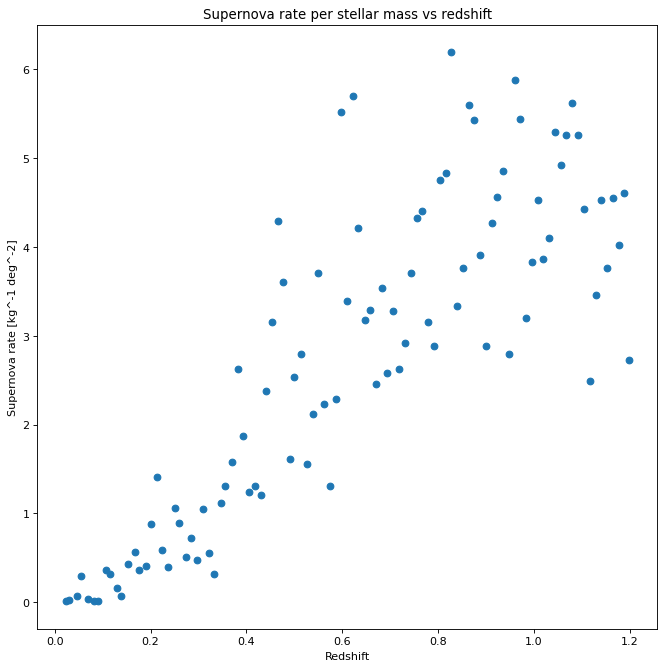

In [19]:
#Supernova rate per stellar mass per square degree

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sm_per_square_degree))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [kg^-1 deg^-2]')
plt.title('Supernova rate per stellar mass vs redshift')

plt.show()

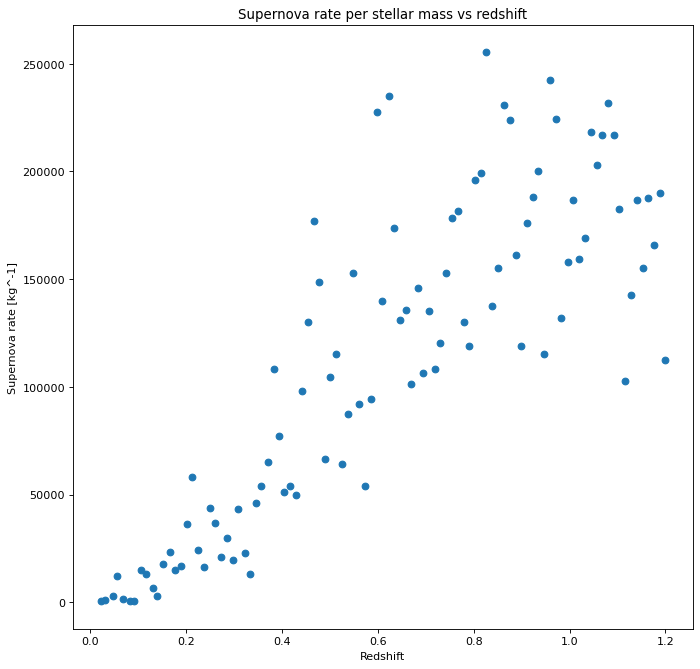

In [20]:
#Supernova rate per stellar mass all sky

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sm_all_sky))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [kg^-1]')
plt.title('Supernova rate per stellar mass vs redshift')

plt.show()

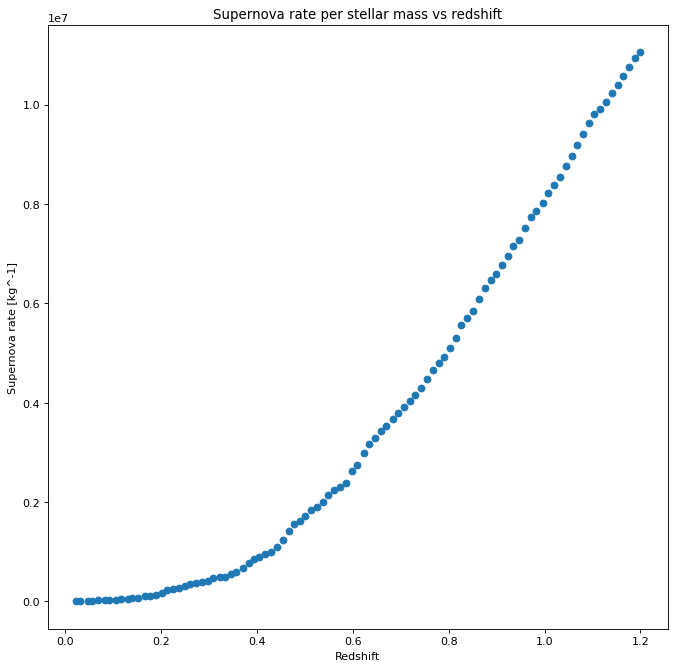

In [21]:
#Supernova rate per stellar mass all sky

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sm_all_sky_cum))
plt.xlabel('Redshift')
plt.ylabel('Cumulative Supernova rate [kg^-1]')
plt.title('Cumulative Supernova rate per stellar mass vs redshift')

plt.show()

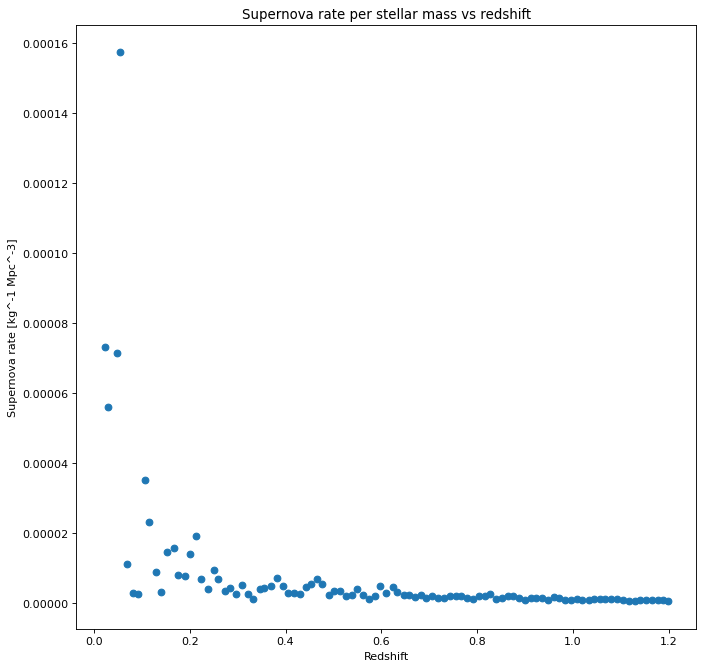

In [22]:
#Supernova rate per stellar mass per Mpc^3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sm_per_vol))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [kg^-1 Mpc^-3]')
plt.title('Supernova rate per stellar mass vs redshift')

plt.show()

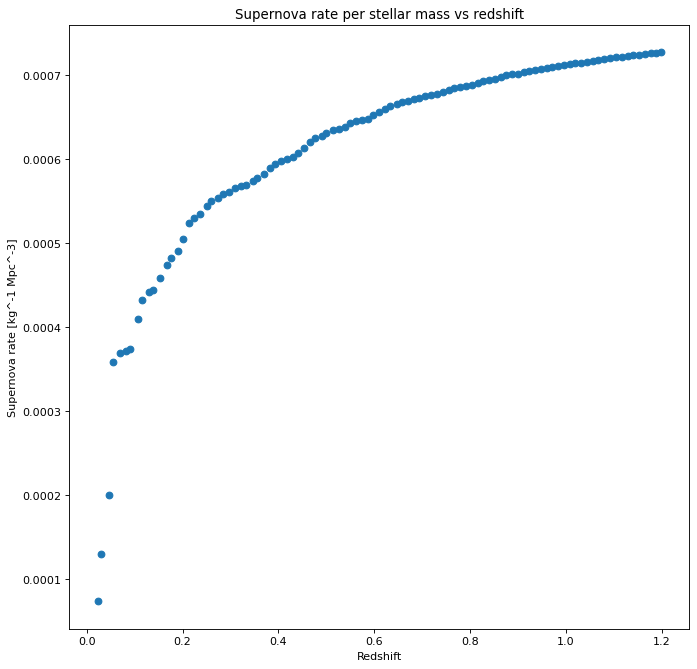

In [23]:
#Supernova rate per stellar mass per Mpc^3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sm_per_vol_cum))
plt.xlabel('Redshift')
plt.ylabel('Cumulative Supernova rate [kg^-1 Mpc^-3]')
plt.title('Cumulative Supernova rate per stellar mass vs redshift')

plt.show()

In [24]:
#Supernova rates per star formation rate

sfr = data['supernovae_rate_per_star_formation_rate']
bin_sum_sfr = [sm[digitized_z == i].sum() for i in range(0, len(bins_z))]
bin_sum_sfr_per_square_degree = np.array(bin_sum_sfr)/survey_area
bin_sum_sfr_all_sky = bin_sum_sfr_per_square_degree*41253
bin_sum_sfr_all_sky_cum = np.cumsum(bin_sum_sfr_all_sky)
bin_sum_sfr_per_vol = bin_sum_sfr_all_sky/comoving_volume
bin_sum_sfr_per_vol_cum = np.cumsum(bin_sum_sfr_per_vol)

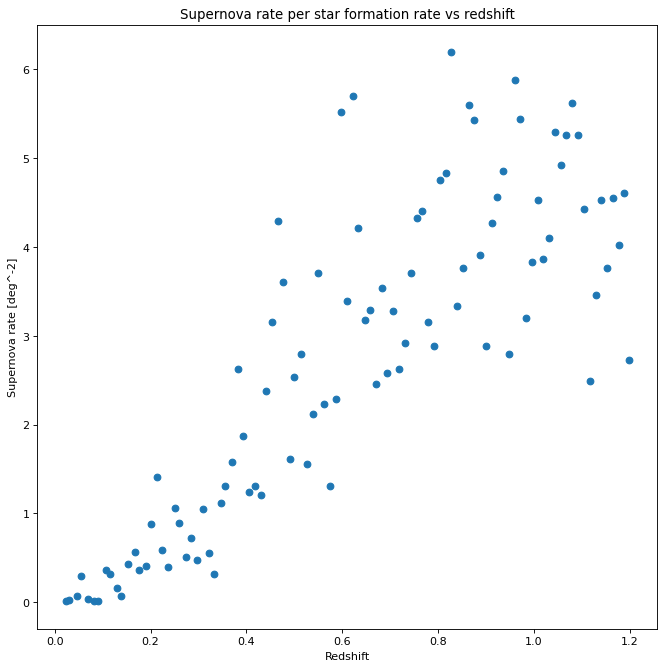

In [25]:
#Supernova rates per star formation rate per square degree

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sfr_per_square_degree))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [deg^-2]')
plt.title('Supernova rate per star formation rate vs redshift')

plt.show()

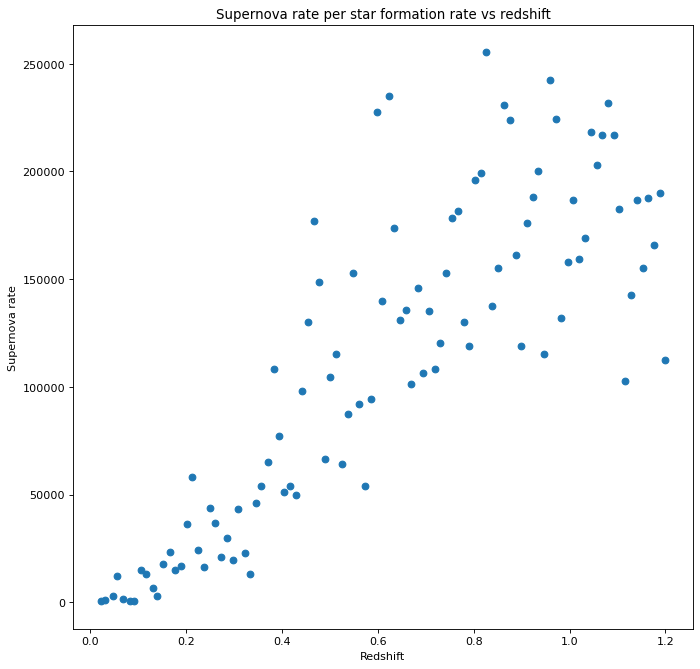

In [26]:
#Supernova rates per star formation rate all sky

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sfr_all_sky))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate')
plt.title('Supernova rate per star formation rate vs redshift')

plt.show()

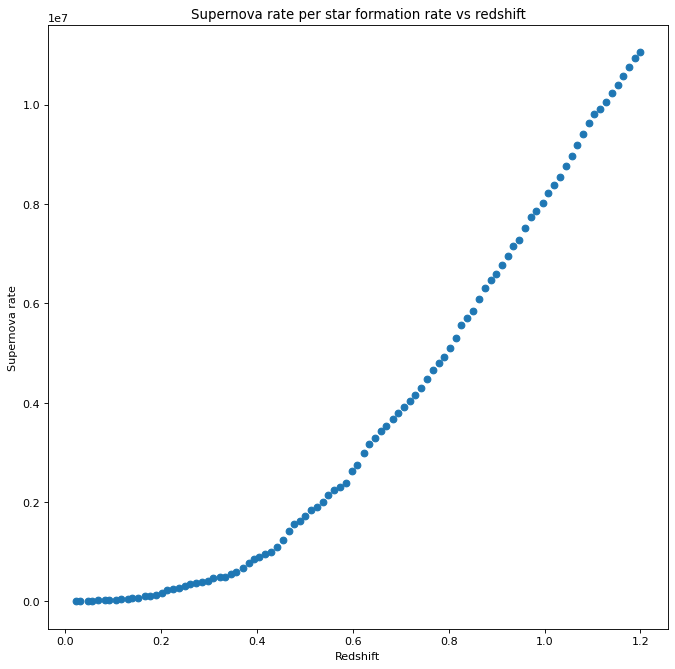

In [27]:
#Supernova rates per star formation rate all sky

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sfr_all_sky_cum))
plt.xlabel('Redshift')
plt.ylabel('Cumulative Supernova rate')
plt.title('Cumulative Supernova rate per star formation rate vs redshift')

plt.show()

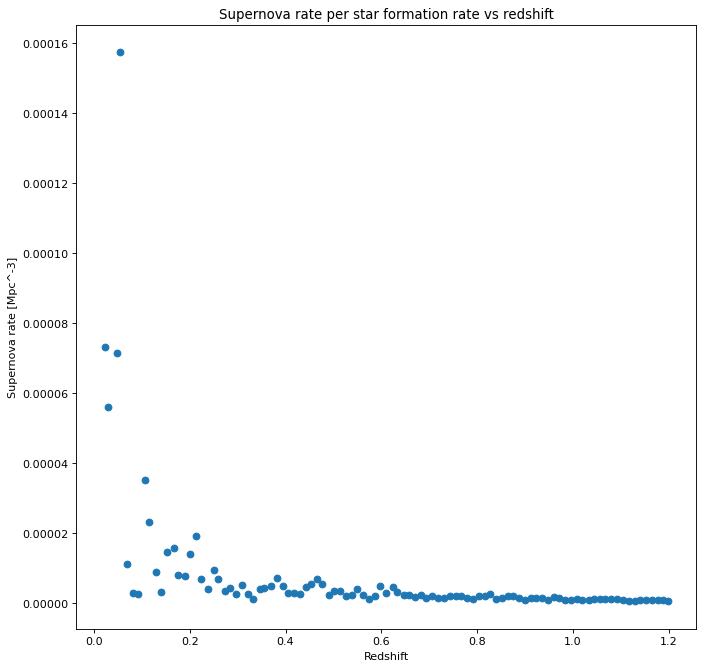

In [28]:
#Supernova rates per star formation rate per Mpc^3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sfr_per_vol))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [Mpc^-3]')
plt.title('Supernova rate per star formation rate vs redshift')

plt.show()

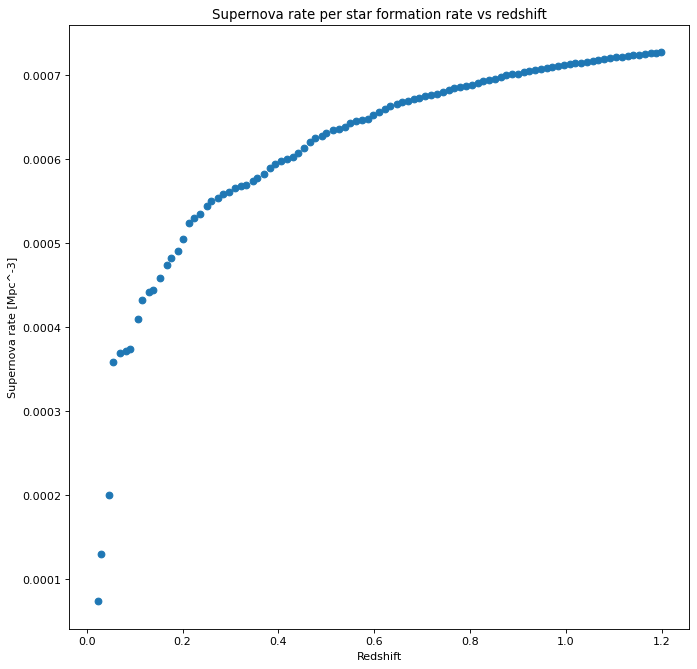

In [29]:
#Supernova rates per star formation rate per Mpc^3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_sum_sfr_per_vol_cum))
plt.xlabel('Redshift')
plt.ylabel('Cumulative Supernova rate [Mpc^-3]')
plt.title('Cumulative Supernova rate per star formation rate vs redshift')

plt.show()